# Importing Dependencies



In [ ]:
import tensorflow as tf 
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from skimage import io , color 

In [ ]:
original_model = tf.keras.models.load_model('C:/Users/91898/Desktop/Convolutional Neural Network/new/cnn.h5')         # Original model 
first_iteration = tf.keras.models.load_model('C:/Users/91898/Desktop/Convolutional Neural Network/new/cnn_2.h5')      # Original model with dataset tweaks and Image augmentation during training             
second_iteration = tf.keras.models.load_model("C:/Users/91898/Desktop/Convolutional Neural Network/new/Kernel_Change.h5") # Model with dataset tweaks, Image augmentation and Kernel size changes 
fringe_model = tf.keras.models.load_model("C:/Users/91898/Desktop/Convolutional Neural Network/new/Hybrid_Theory.h5")         # Model with a single convolution layer 
accurate_model = tf.keras.models.load_model("C:/Users/91898/Desktop/Convolutional Neural Network/new/accuracy.h5") # Model with Filter size increased to 32 (Highest accuracy)

Shows the specifications of our CNN model. We have an input layer which takes the image matrix of shape (128,128) that goes to a Conv2d layers that convolves the matrix and returns 8 such matrices of the same shape. Next we have a Rectified Linear Unit (ReLU) layer as an Activation Function. ReLU are great for CNNs as they help in Gradient Computation a lot and help save us resources while returning effective transformations. Next we have a MaxPoolLayer which reduces the dimensions of our (128,128,8) matrix to (16,16,8). Max Pooling is used because it reduces the dimension hence saving the computational resources and also it returns the image's sharpest and smoothest features.Then we have thesee 3 layers repeating again as you can see which are connected to a Flatten layer. A Flatten layers, as the name suggests, Flattens it's input i.e , it converts it's (4,4,16) layer into a (256,) layer (4*4*16). We need to flatten the layer because multi-dimensional input tensors into a single dimension, so you can model your input layer and build your neural network model. Then we have a fully connected neural network which outputs 6 Probabilities (through a softmax activation function) for each of our 6 categorical possible outputs (0,1,2,3,4,5). (Describes original_model. Other models are pretty similar with minor changes)

In [28]:
def summary(model):
    return model.summary()

summary(original_model)
summary(first_iteration)
summary(second_iteration)
summary(fringe_model)
summary(accurate_model)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 8)       136       
                                                                 
 re_lu (ReLU)                (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        528       
                                                                 
 re_lu_1 (ReLU)              (None, 16, 16, 16)        0         
                                                             

# Image Preprocessing

*   Grayscaling
*   Resizing
*   Noising



In [29]:
def resize(img_address):                                                          # Takes the image address as a Parameter and resizes the image to (128,128)
    import cv2 
    img = cv2.imread(img_address)
    image = cv2.resize(img,(128,128))
    return image

def grayscale(image):                                                    # This function takes the image address as a Parameter. It reads the image and converts it into it's Pixel Intensity Matrix (Numpy Array).          
    image = color.rgb2gray(image)                                                # rgb2gray converts the RGB (nxnx3) image to a Grayscaled (nxnx1) since the model is trained on Black & White images it would not work on RGB images.
    io.imshow(image)                                                             # shows the image
    #image = np.expand_dims(image,0)                                              # To fix the dimensionality issue of the numpy array (rgb2gray function returns an array of shape (n,n,1) and since we are only working with one filter we remove the last dimension to save computation resources
    return image                                                                  # Returns the Pixel Intensity matrix of the image which has been grayscaled 
    
    
    

def gauss(img):                                                                             # Applies the gaussian,pareto or poisson noise over the image 
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    gaussian = np.random.normal(mean,var,(128, 128)) #  np.zeros((224, 224), np.float32)
    pareto = np.random.pareto(150,(128,128))
    poisson = np.random.poisson(0.003,(128,128))
    
    noisy_image = np.zeros(img.shape, np.float32)

    if len(img.shape) == 2:
        noisy_image = img+pareto
    else:
        noisy_image[:, :, 0] = img[:, :, 0] + gaussian
        noisy_image[:, :, 1] = img[:, :, 1] + gaussian
        noisy_image[:, :, 2] = img[:, :, 2] + gaussian

    cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    noisy_image = noisy_image.astype(np.uint8)
    
    plt.imshow(noisy_image,cmap='gray')
    
    return noisy_image

(1, 128, 128)

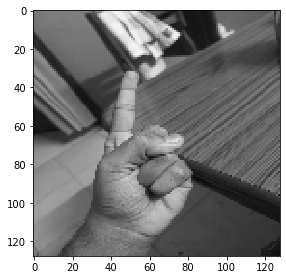

In [78]:
image_address=r"C:/Users/91898/Downloads/sf.jpg"
image = resize(image_address)
image = grayscale(image)        #Grayscalesthe resized image 
#image = gauss(image)          #Applies noise to the Resized and Grayscaled image 
image = np.expand_dims(image,0) #Removes the last dimension as it is unrequired. 
len(image.shape)
image.shape

In [79]:
median_pred

3.0

# Prediction Time 

In [80]:
org_pred = original_model.predict(image)      #Calls our models to predict how many fingers are being held up. They will all Return an array containing probabilities (from 0 to 1) with 
first_pred = first_iteration.predict(image)   #it's index number denoting what finger's probability it is. Example: pred[0] return the probability no fingers are being held up 
second_pred = second_iteration.predict(image)     
fringe_pred = fringe_model.predict(image)
accurate_pred = accurate_model.predict(image)
median_pred = np.median([give_user_pred(org_pred),give_user_pred(first_pred),give_user_pred(second_pred),give_user_pred(fringe_pred),give_user_pred(accurate_pred)])


1/1 [==============================] - 0s 16ms/step


In [81]:
def give_user_pred(arr,var=0):          # A small function that is basically a search algorithm for the max element in the prediction array.
    for a in range(len(arr[0])):        # It returns the index of the max element that is essentially, the amount of fingers being held up.
        if arr[0][a]>var:
            var = arr[0][a]
            index = a 
    return index 

# Proposed Theory 

### **About the Dataset**


---



I chose this Dataset because it seemed like an interesting challenge as it didn't have any good solutions posted on the forum and thought I could learn from this. The dataset in itself is not very big and all the images are extremely similar and are set in an environment (No Wrists, Denoised, Black Background and Centered) that has little to no practical significance. So I had to do my best to make the dataset usable for practical usage. For this, I did some Data Augmentation while training these models which proved to be extremely useful as the accuracy on the test dataset did go down but that was a good sign proving that the model was not overfitting on the dataset anymore. But still, my model was not showing the best of outputs as it was finding it difficult to hang on to real life noise and features in the background and foreground of the hand.




### Theoretical Solution


---


After a while I had trained a lot of models tweaking a bunch of hyperparameters.
On looking at the results I saw a little pattern. Since all the images were trained with different params, they were all locking on to slightly different feature of the Image. That is when I realised that the outputs of each of these models can be used to make a final prediction. So in my proposed idea, we take the prediction from each of our pre-trained models and take a floored mean of them and use that as a final prediction. I also tried using different mean techniques and even a voting system, but I could not research about them a lot due to an unforseeable health issue which took my attention. This theory of course has a lot of flaws and does not have a lot of mathematics to back it up, just a lot of experimental data. I would love to research it more but until then, this would be my proposal. Thank you for reading. 

In [82]:
def output():   #A function to output the prediction of all of our models
  print("Original Model's Prediction :" + " " + str(give_user_pred(org_pred)))           #Returns the Original model's prediction
  print("First Iteration's Prediction :" + " " + str(give_user_pred(first_pred)))        #Returns the Tweaked Original model's prediction
  print("Second Iteration's Prediction :" + " " + str(give_user_pred(second_pred)))      #Returns the model with kernel changes' prediction
  print("The fringe model's Prediction " +  " " + str(give_user_pred(fringe_pred)))      #Returns the model with only 1 conv layer's prediction
  print("New and Accurate model's prediction : " + str(give_user_pred(accurate_pred)))   #Returns the model with increased no. of filters' layer's prediction 
  my_pred = (give_user_pred(org_pred)+give_user_pred(first_pred)+give_user_pred(second_pred)+give_user_pred(fringe_pred))//4   # Mean of all the outputs (excluding accurate_pred)
  new_my_pred = (give_user_pred(first_pred)+give_user_pred(second_pred)+give_user_pred(fringe_pred) + give_user_pred(accurate_pred))//5 # Floored mean of the all predictions 
  alpha_pred = (my_pred + give_user_pred(accurate_pred))//2  #Floored mean of the accurate_model's predictions and the floored mean of the other predictions
  print('Supposed Prediction : ' + str(my_pred))
  print("Alpha prediction : " + str(alpha_pred))
  print("Final Prediction : " + str(new_my_pred))
  print("median prediction :" + str(median_pred))

   


In [83]:
output()   # A look at our model's prediction (I am placing my bets on - Final Prediction)

Original Model's Prediction : 3
First Iteration's Prediction : 3
Second Iteration's Prediction : 4
The fringe model's Prediction  3
New and Accurate model's prediction : 3
Supposed Prediction : 3
Alpha prediction : 3
Final Prediction : 2
median prediction :3.0


2

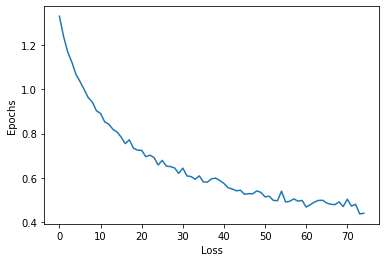

         Epoch-Loss generated during Training of accuracy.h5




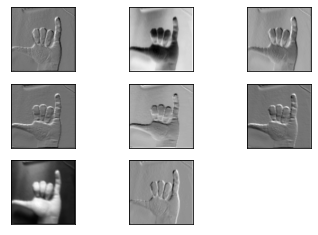


      Filter mapping of the images created by the convolution layer




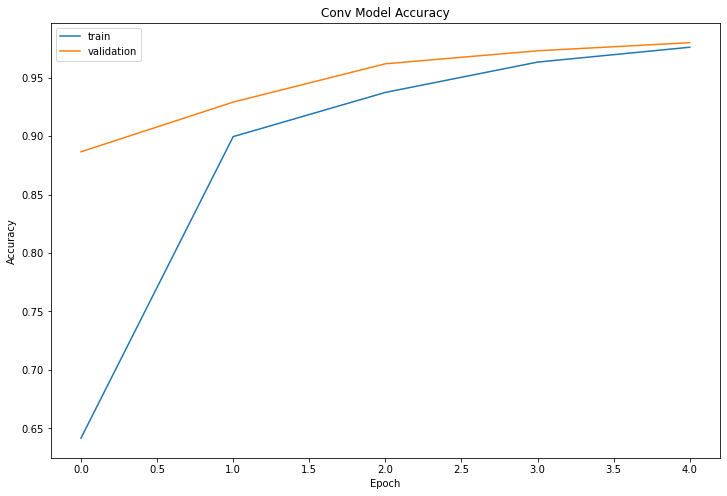


      Accuracy-Epoch Generated during training cnn.h5

                                    

--- ---


                                    
                                    
                                    
                                    
                                    
  *Notebook maintained by Shreyas Datar*

In [ ]:
import os,shutil
from matplotlib import image
folder = r"C:/Users/91898/Desktop/Finger Counting/Vipul_Dataset/0"
def accuracy(test_dir):
    figure = plt.figure(figsize=[10,7])
    account = {"Original Model":0 ,
               "Second Model" : 0 , 
               "Kernel Changes": 0,
               "Hybrid Theory":0,
               "Final Model":0,
               "Supposed Prediction":0,
               "Alpha Predictor":0,
               "Final Prediction":0}
    for kart in os.listdir(test_dir):
       
        f = os.path.join(test_dir,kart)
        img = image.imread(f)
        img = np.array(img)
        img = np.expand_dims(img,0)
        print(img)
        
       # target = int(f[-6:-5])
        for pred in output_new(img):
                
            if output_new(img)[pred]==0: #target 
                    
                    
                print(account[pred])
                account[pred]+=1
                print(account)
                names = list(account.keys())
                values = list(account.values())
                plt.plot(names,values)
                plt.bar(names,values)
    plt.show()     
   

print(accuracy(folder))
        

In [19]:
def output_new(image): #A function to output the prediction of all of our models
        #Calls our models to predict how many fingers are being held up. They will all Return an array containing probabilities (from 0 to 1) with 
    org_pred = original_model.predict(image)      #Calls our models to predict how many fingers are being held up. They will all Return an array containing probabilities (from 0 to 1) with 
    first_pred = first_iteration.predict(image)   #it's index number denoting what finger's probability it is. Example: pred[0] return the probability no fingers are being held up 
    second_pred = second_iteration.predict(image)     
    fringe_pred = fringe_model.predict(image)
    accurate_pred = accurate_model.predict(image)
 
    

           
    my_pred = (give_user_pred(org_pred)+give_user_pred(first_pred)+give_user_pred(second_pred)+give_user_pred(fringe_pred))//4   # Mean of all the outputs (excluding accurate_pred)
    new_my_pred = (give_user_pred(first_pred)+give_user_pred(second_pred)+give_user_pred(fringe_pred) + give_user_pred(accurate_pred))//5 # Floored mean of the all predictions 
    alpha_pred = (my_pred + give_user_pred(accurate_pred))//2  #Floored mean of the accurate_model's predictions and the floored mean of the other predictions
    
    account = {"Original Model": give_user_pred(org_pred) ,
                   "Second Model" : give_user_pred(first_pred), 
                   "Kernel Changes": give_user_pred(second_pred),
                   "Hybrid Theory":give_user_pred(fringe_pred),
                   "Final Model": give_user_pred(accurate_pred),
                   "Supposed Prediction":my_pred,
                   "Alpha Predictor":alpha_pred,
                   "Final Prediction":new_my_pred}
    return account

In [85]:
mean = 39/8
mean

4.875

In [86]:
std = 7*(5-mean)+(mean-4)
std

1.75

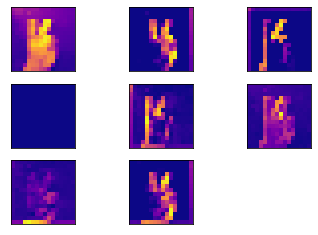

In [100]:
square = 3
ix = 1
for _ in range(square):
    for _ in range(square):
        if ix == 9:
            break
        else:
            ax = plt.subplot(square,square,ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(accurate_pred_mode[0,:,:,ix-1] , cmap='plasma')
            ix += 1 
        
plt.show()